In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler # To transform the dataset
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

In [3]:
df = pd.read_csv('words_glasgow.csv',skipinitialspace=True)

In [4]:
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


In [5]:
cols = [col for col in df.columns if col != 'word' and col != 'polysemy'\
        and col!='web_corpus_freq' and col!='length' and col!='imageability']
X = df[cols].values
print (X)
scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

[[4.2   2.864 4.333 ... 6.76  4.652 5.391]
 [3.125 5.781 4.667 ... 5.177 5.121 3.303]
 [3.273 5.25  5.235 ... 5.543 2.667 3.971]
 ...
 [5.969 6.818 6.121 ... 5.364 2.636 3.452]
 [5.909 6.235 5.485 ... 2.324 4.844 4.059]
 [4.571 5.765 5.114 ... 5.824 4.571 3.657]]


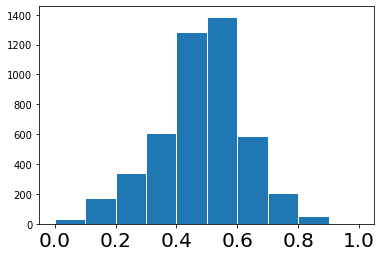

In [6]:
scaler = MinMaxScaler() #IMPORTANTE
X_minmax = scaler.fit_transform(X)

plt.hist(X_minmax[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

In [7]:
X_minmax

array([[0.3501634 , 0.24077721, 0.37200622, ..., 0.96331711, 0.59183673,
        0.73538771],
       [0.1745098 , 0.62373638, 0.42395023, ..., 0.68810848, 0.67653964,
        0.38569754],
       [0.19869281, 0.55402389, 0.51228616, ..., 0.75173853, 0.23333935,
        0.4975716 ],
       ...,
       [0.63921569, 0.75987922, 0.65007776, ..., 0.72061892, 0.22774065,
        0.41065148],
       [0.62941176, 0.6833399 , 0.55116641, ..., 0.19210709, 0.62651255,
        0.5123095 ],
       [0.41078431, 0.62163581, 0.49346812, ..., 0.8005911 , 0.57720787,
        0.44498409]])

In [8]:
X # 0-arousal, 1-valence, 2-dominance, 3-concreteness, 4-familiarity, 5-aoa, 6-semsize, 7-gender

array([[4.2  , 2.864, 4.333, ..., 6.76 , 4.652, 5.391],
       [3.125, 5.781, 4.667, ..., 5.177, 5.121, 3.303],
       [3.273, 5.25 , 5.235, ..., 5.543, 2.667, 3.971],
       ...,
       [5.969, 6.818, 6.121, ..., 5.364, 2.636, 3.452],
       [5.909, 6.235, 5.485, ..., 2.324, 4.844, 4.059],
       [4.571, 5.765, 5.114, ..., 5.824, 4.571, 3.657]])

In [9]:
kmeans = KMeans( n_clusters = 3, n_init=10, max_iter=500 )
kmeans.fit(X_minmax)

KMeans(max_iter=500, n_clusters=3)

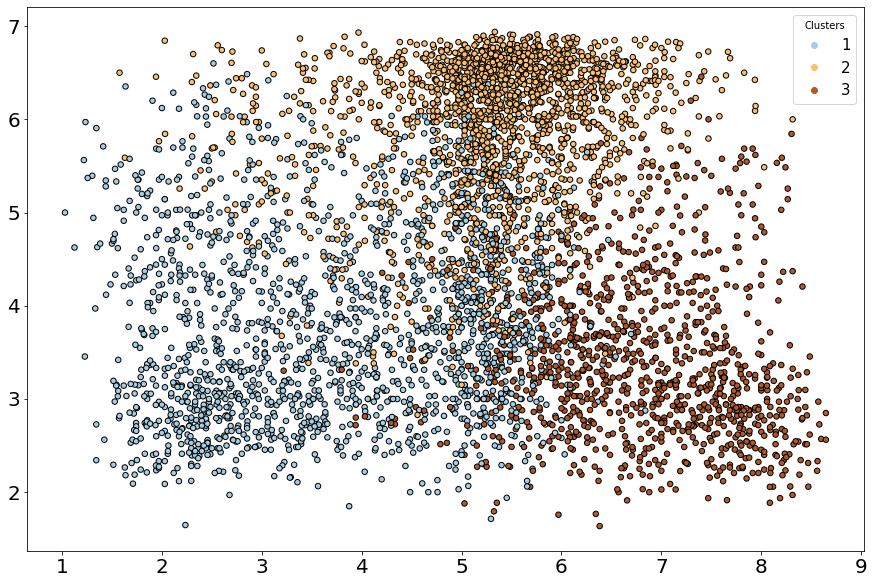

In [10]:
plt.figure(figsize=(15,10))
sp_names = ['1', '2', '3']
scatter = plt.scatter( X[:,1], X[:,3], s = 30, edgecolor='black', c = kmeans.labels_, cmap = 'Paired')
plt.legend(handles=scatter.legend_elements()[0], labels=sp_names, title="Clusters", fontsize = 15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [11]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([1739, 1860, 1083]))

In [12]:
kmeans.cluster_centers_

array([[0.38504916, 0.35866437, 0.37992724, 0.40983395, 0.58572576,
        0.64967807, 0.53100783, 0.56379314],
       [0.36797913, 0.56366482, 0.4987208 , 0.81209769, 0.73648924,
        0.37245175, 0.39019548, 0.51890436],
       [0.6013001 , 0.75853072, 0.62032974, 0.33648446, 0.75541698,
        0.51511394, 0.63325307, 0.44795134]])

In [13]:
centers = kmeans.cluster_centers_

In [14]:
centers = scaler.inverse_transform(centers)

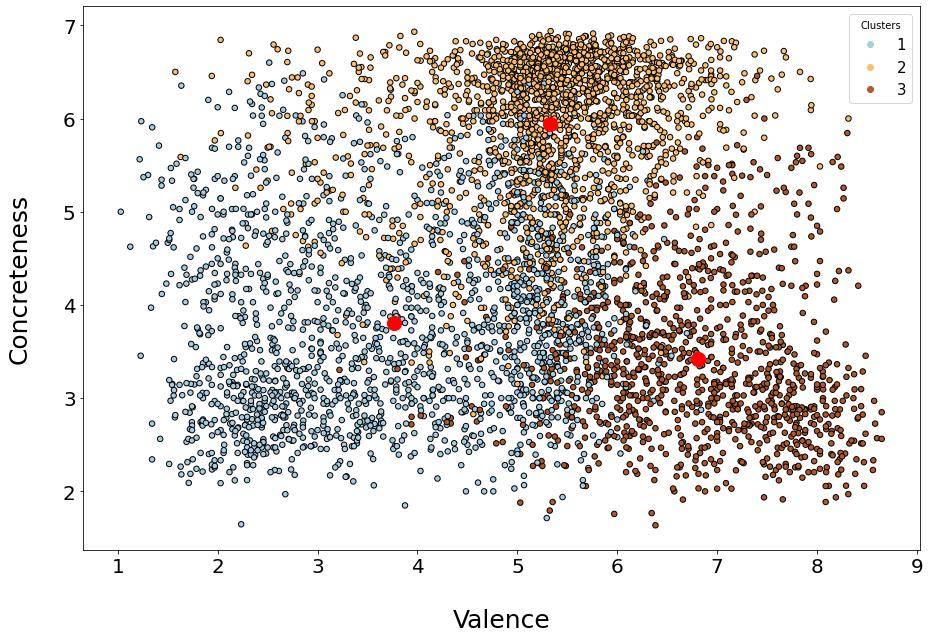

In [15]:
plt.figure(figsize=(15,10))
scatter = plt.scatter( X[:,1], X[:,3], s = 30, edgecolor='black', c = kmeans.labels_, cmap = 'Paired')
plt.scatter( centers[:,1], centers[:,3], c='red', marker='o', s=200 )
plt.legend(handles=scatter.legend_elements()[0], labels=sp_names, title="Clusters", fontsize = 15)
plt.ylabel('Concreteness\n', fontsize=25)
plt.xlabel('\nValence', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

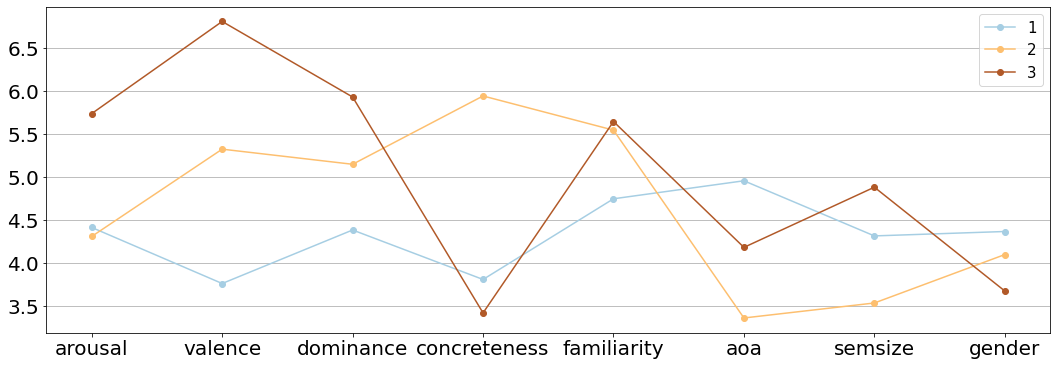

In [16]:
plt.figure(figsize=(18, 6))
clust_name = ['1', '2', '3']
colors = ['#A6CEE3', '#FDBF6F', '#B15928']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label = clust_name[i], c = colors[i])
    
plt.xticks(range(0,len(cols)), cols, fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=15, loc='best')
plt.grid(axis='y')

In [17]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([1739, 1860, 1083]))

In [18]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 877.300910079236
Silhouette 0.23419608329164834


In [19]:
sse_list = []

for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append( kmeans.inertia_ )

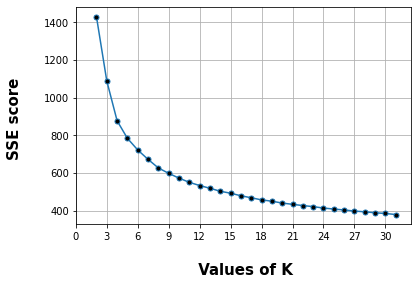

In [20]:
values = [0,3,6,9,12,15,18,21,24,27,30]
plt.rcParams['axes.facecolor'] = 'w'
plt.plot(range(2, len(sse_list)+2), sse_list, marker='.', markersize=10, markerfacecolor='black')
plt.ylabel('SSE score \n', fontsize = 15, fontweight = 'bold')
plt.xlabel('\n Values of K', fontsize = 15, fontweight = 'bold')
plt.xticks(values)
plt.grid(True)
plt.show()

In [21]:
dist = pdist(X_minmax, 'euclidean')
dist = squareform(dist)

k=3
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

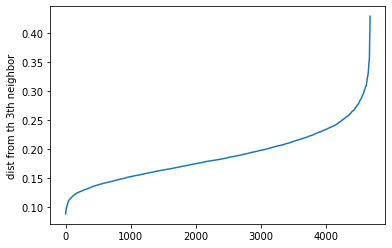

In [22]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 3th neighbor')
         
plt.show()

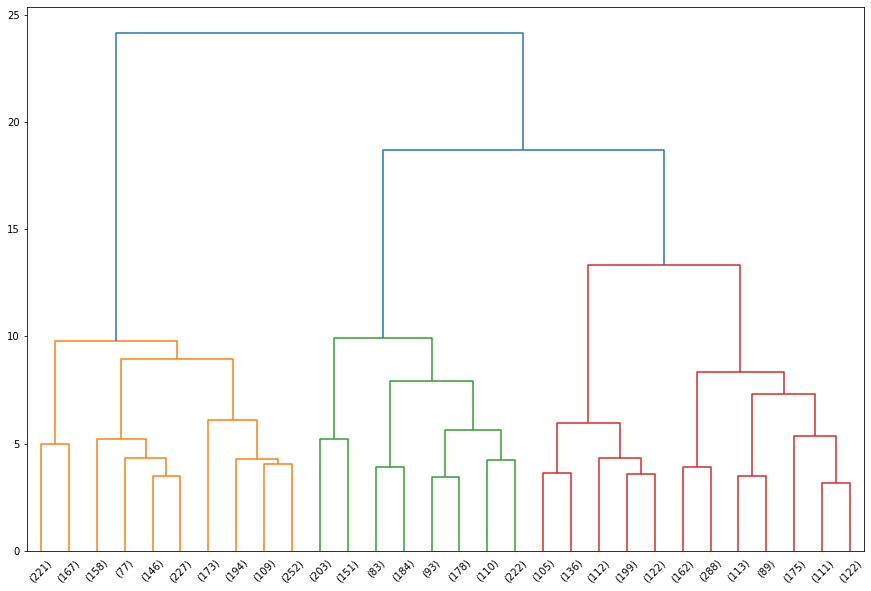

In [23]:
plt.figure(figsize=(15,10))
data_dist = pdist(X_minmax, metric='euclidean')
data_link = linkage(data_dist, method='ward')

res = dendrogram(data_link, truncate_mode='lastp')

In [24]:
hier = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
hier.fit(X_minmax)

AgglomerativeClustering(n_clusters=3)

In [26]:
hier.labels_

array([2, 1, 2, ..., 0, 1, 1])

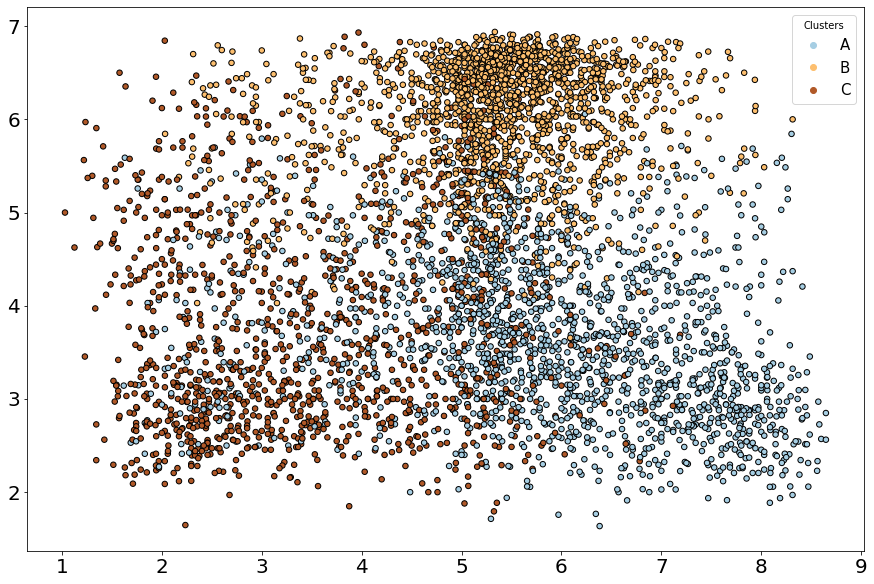

In [27]:
plt.figure(figsize = (15,10))
sp_names = ['A', 'B', 'C']
scatter = plt.scatter( X[:,1], X[:,3], s = 30, edgecolor='black', c = hier.labels_, cmap = 'Paired')
plt.legend(handles=scatter.legend_elements()[0], labels=sp_names, title="Clusters", fontsize = 15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

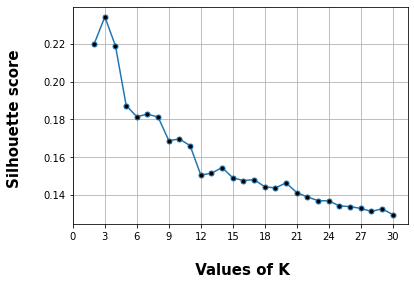

In [28]:
values = [0,3,6,9,12,15,18,21,24,27,30]
plt.rcParams['axes.facecolor'] = 'w'
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_minmax)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X_minmax, kmeans.labels_))
    
plt.plot(range_n_clusters,silhouette_avg, marker='.', markersize=10, markerfacecolor='black')
plt.xlabel('\n Values of K', fontsize = 15, fontweight = 'bold')
plt.ylabel('Silhouette score \n', fontsize = 15, fontweight = 'bold')
plt.xticks(values)
plt.grid(True)
plt.show()

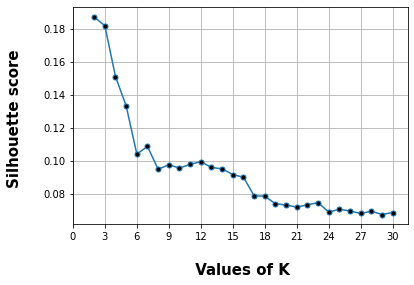

In [29]:
values = [0,3,6,9,12,15,18,21,24,27,30]
plt.rcParams['axes.facecolor'] = 'w'
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
silhouette_avg = []
for num_clusters in range_n_clusters:
    hier = AgglomerativeClustering(n_clusters = num_clusters, affinity='euclidean', linkage='ward')
    hier.fit(X_minmax)
    cluster_labels = hier.labels_
    silhouette_avg.append(silhouette_score(X_minmax, hier.labels_))
    
plt.plot(range_n_clusters,silhouette_avg, marker='.', markersize=10, markerfacecolor='black')
plt.xlabel('\n Values of K', fontsize = 15, fontweight = 'bold')
plt.ylabel('Silhouette score \n', fontsize = 15, fontweight = 'bold')
plt.xticks(values)
plt.grid(True)
plt.show()

In [30]:
df.describe()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
count,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4.668000e+03
mean,6.348355,4.678129,5.086797,5.044939,4.566273,4.723018,5.271335,4.143427,4.136403,4.099933,0.080948,2.988976e+07
std,2.006230,1.097163,1.594344,0.930669,1.433689,1.363110,0.921218,1.252770,1.023293,0.912293,0.272785,8.490144e+07
min,2.000000,2.057000,1.030000,1.941000,1.636000,1.737000,1.647000,1.219000,1.375000,1.000000,0.000000,1.277000e+04
25%,5.000000,3.849000,4.115000,4.529000,3.242000,3.519250,4.706000,3.114000,3.438000,3.606000,0.000000,1.671100e+06
50%,6.000000,4.571000,5.290000,5.123000,4.471000,4.677000,5.438000,4.177000,4.186500,4.121000,0.000000,5.702982e+06
75%,8.000000,5.419000,6.088000,5.600000,5.971000,6.032000,5.969000,5.152000,4.882000,4.656000,0.000000,2.232705e+07
max,16.000000,8.177000,8.647000,8.371000,6.938000,6.941000,6.939000,6.971000,6.912000,6.971000,1.000000,2.022460e+09


In [31]:
neigh = NearestNeighbors(n_neighbors = 5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

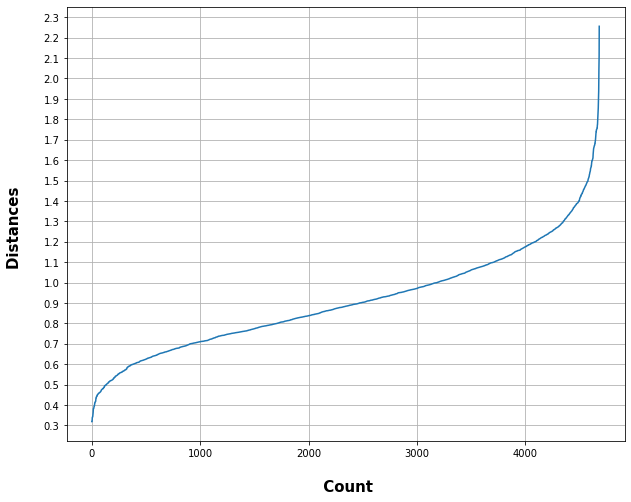

In [32]:
plt.figure(figsize = (10,8))
v = (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4)
plt.rcParams['axes.facecolor'] = 'w'
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('\n Count', fontsize = 15, fontweight = 'bold')
plt.ylabel('Distances \n', fontsize = 15, fontweight = 'bold')
plt.yticks(v)
plt.plot(distances)
plt.grid(True)
plt.show()

In [33]:
dataframe = df.drop(columns= ['word','polysemy', 'web_corpus_freq', 'length','imageability'])

In [34]:
scaler = StandardScaler()

In [35]:
scaled_array = scaler.fit_transform(X_scal)

In [36]:
scaled_dataframe = pd.DataFrame( scaled_array, columns = dataframe.columns )

In [37]:
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 2.5, 0.1)]
min_samples_to_test = range(5, 50, 5)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4]
MIN_SAMPLES: [5, 10, 15, 20, 25, 30, 35, 40, 45]


In [38]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan_model_.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters+1))
        
    return(noise_mean_distance, number_of_clusters)

In [39]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [40]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, scaled_dataframe, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 0.979    1
  2 | Tested with eps = 0.1 and min_samples =  10 | 0.979    1
  3 | Tested with eps = 0.1 and min_samples =  15 | 0.979    1
  4 | Tested with eps = 0.1 and min_samples =  20 | 0.979    1
  5 | Tested with eps = 0.1 and min_samples =  25 | 0.979    1
  6 | Tested with eps = 0.1 and min_samples =  30 | 0.979    1
  7 | Tested with eps = 0.1 and min_samples =  35 | 0.979    1
  8 | Tested with eps = 0.1 and min_samples =  40 | 0.979    1
  9 | Tested with eps = 0.1 and min_samples =  45 | 0.979    1
 10 | Tested with eps = 0.2 and min_samples =   5 | 0.979    1
 11 | Tested with eps = 0.2 and min_samples =  10 | 0.979    1
 12 | Tested with eps = 0.2 and min_samples =  15 | 0.979    1
 13 | Tested with eps = 0.2 and min_samples =  20 | 0.979    1
 14 | Tested with eps = 0.2 and min_samples =  25

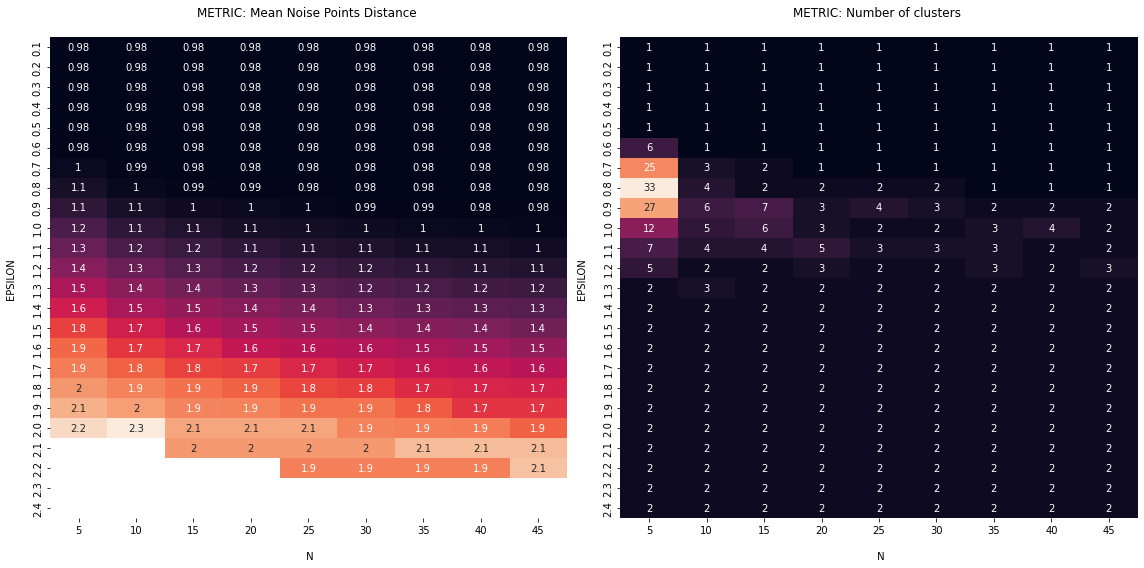

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance \n")
sns.heatmap(results_clusters+1, annot = True, cbar = False).set_title("METRIC: Number of clusters \n ")

ax1.set_xlabel("\n N"); ax2.set_xlabel("\n N")
ax1.set_ylabel("EPSILON \n"); ax2.set_ylabel("EPSILON \n")

plt.tight_layout(); plt.show()

In [42]:
dbscan = DBSCAN(eps=1.2, min_samples=10)
dbscan.fit(X_scal)

DBSCAN(eps=1.2, min_samples=10)

In [43]:
dbscan.labels_

array([-1,  0,  0, ..., -1,  0,  0])

In [44]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0]), array([ 831, 3851]))

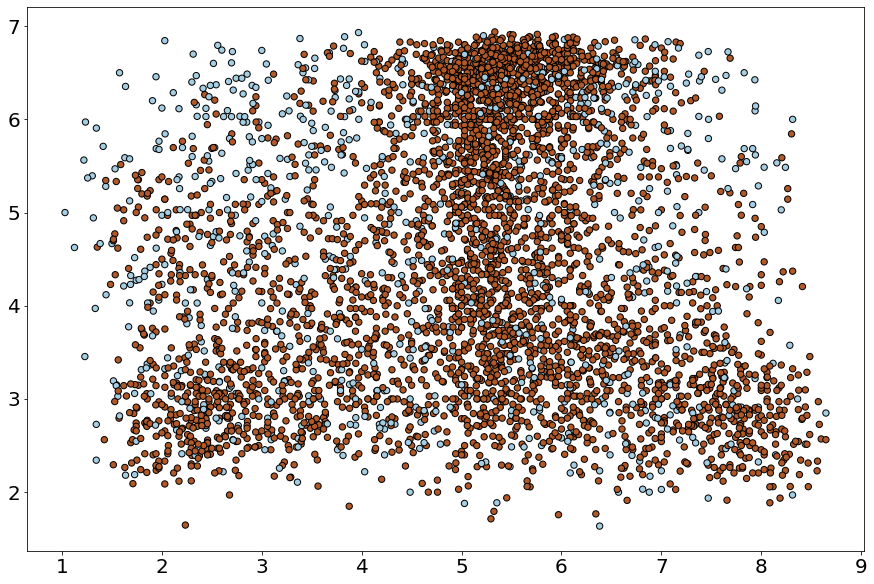

In [45]:
plt.figure(figsize = (15,10))
plt.scatter( X[:,1], X[:,3], s=40, edgecolor='black', c= dbscan.labels_, cmap='Paired' )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

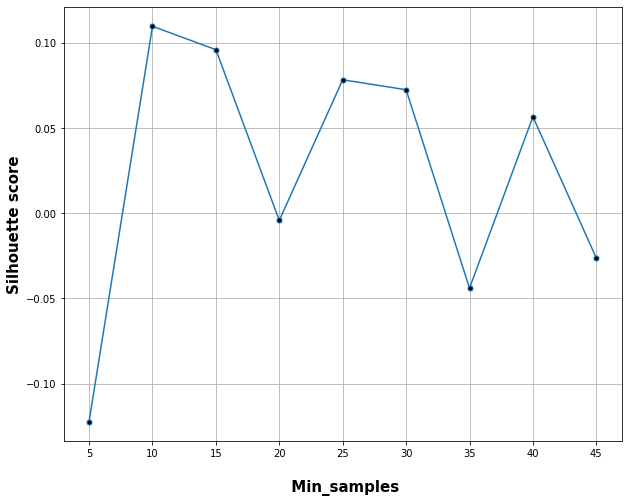

In [46]:
plt.figure(figsize = (10,8))
min_samples_to_test = [5, 10, 15, 20, 25, 30, 35, 40, 45]
values = [5, 10, 15, 20, 25, 30, 35, 40, 45]
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
plt.rcParams['axes.facecolor'] = 'w'
silhouette_avg = []
for min_samples in min_samples_to_test:
    dbscan = DBSCAN(eps = 1.2, min_samples = min_samples)
    dbscan.fit(X_scal)
    cluster_labels = dbscan.labels_
    silhouette_avg.append(silhouette_score(X_scal, dbscan.labels_))
    
plt.plot(min_samples_to_test,silhouette_avg, marker='.', markersize=10, markerfacecolor='black')
plt.xlabel('\n Min_samples', fontsize = 15, fontweight = 'bold')
plt.ylabel('Silhouette score', fontsize = 15, fontweight = 'bold')
plt.grid(True)
plt.xticks(values)
plt.show()